# SECTION 4.2: TWO SUCCESSIVE OUTPUTS

In [1]:
# IMPORTATIONS
import os
import sys
import time
from numpy import *
from matplotlib.pylab import *
from decimal import Decimal
import pickle
import inspect

import treal_functions
import general_functions
import slopes_functions
import prepare_functions
import fitting as fit
import cuspcore_aux
import cuspcore_plots
import evolving
import cuspcore_go

reload(treal_functions)
reload(general_functions)
reload(slopes_functions)
reload(prepare_functions)
reload(fit)
reload(cuspcore_aux)
reload(cuspcore_plots)
reload(evolving)
reload(cuspcore_go)

from general_functions import *
from slopes_functions import *
from prepare_functions import *
from cuspcore_aux import *
from cuspcore_plots import *
from evolving import *

print 'Done on %s at %s'%(time.strftime("%x"),time.strftime("%X"))

Done on 05/08/19 at 17:12:23


/cs/sci/sharonl/miniconda/envs/iyt32/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
execfile("single_params.py")
directory='/cs/sci/freundlich/CUSPCORE/NIHAO_data/'
components=['d']

Ttype='Tmulti'
sim = 'g1.08e11'
k=30

rmin_evolve=10**-1.75
rmax_evolve=1

execfile("single_initialization.py")
execfile("single_load.py")
execfile("single_evolve.py")
execfile("single_fprofile.py")
execfile("single_plotT.py")
execfile("single_plotE.py")

close('all')
print 'Done on %s at %s'%(time.strftime("%x"),time.strftime("%X"))

Simulation g1.08e11
 
Loading existing file Treal-1.08e11.pickle
Reducing the range of gl
Reducing the range of Treal
 
k = 30 - 31: delta = 0.024
p_init : c=85.48, a=-2.46, 1/b=0.50, g=3.00, Rvir=80.45 kpc, Mvir=1.07e+11 Msun
p_final: c=128.13, a=-3.39, 1/b=0.50, g=3.00, Rvir=82.22 kpc, Mvir=1.08e+11 Msun
p_model: c=123.80, a=-3.42, 1/b=0.50, g=3.00, Rvir=80.45 kpc, Mvir=1.07e+11 Msun
 
Done on 05/08/19 at 17:12:52


In [3]:
# FIGURE PROPERTIES

fontsize=20
legendsize=fontsize
linewidth=2
linesize=5
ticksize=fontsize-4
figsize=(8,16)
figsize=(8,6)

rcParams['axes.linewidth'] = 1
rcParams['xtick.major.size'] = 6
rcParams['xtick.major.width'] = 1
rcParams['xtick.minor.size'] = 3
rcParams['xtick.minor.width'] = 1
rcParams['ytick.major.size'] = 6
rcParams['ytick.major.width'] = 1
rcParams['ytick.minor.size'] = 3
rcParams['ytick.minor.width'] = 1
rcParams['xtick.labelsize'] = fontsize
rcParams['ytick.labelsize'] = fontsize

rcParams['figure.subplot.left']=0.15
rcParams['figure.subplot.right']=0.95
rcParams['figure.subplot.bottom']=0.15
rcParams['figure.subplot.top']=0.95
rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.1


delta    =  0.023204006007
delta_i  =  0.077377983979
delta_if =  0.0541983059548
fmean    =  0.104496280158
fstd     =  0.128060607408


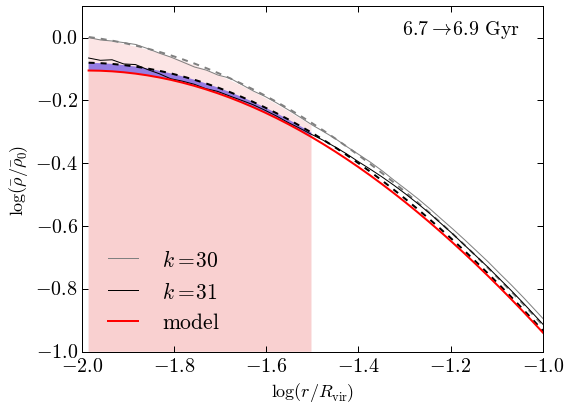

In [6]:
delta_ymin=-1.
comp='d'
plot_prediction=True
rmin_evolve=10**-1.75
rmax_evolve=1
Ttype='Tmulti'
limits=[-2., -1,-1., 0.1]
limits_fprofile=[-2.2, 0.2, -0.05, 0.55]
figsize=(8,6)
use_RMvir=False

figure(figsize=figsize)

j=1
for (i,col,label) in zip((k,k+1),('gray','black'),('before','after')):
    ss = gl[i]
    t = ss['t']
    r = ss[comp]['r']
    brho = ss[comp]['brho']
    brhofit = ss[comp][fitname]['brho']
    p = ss[comp][fitname]['p']

    Rvir=rvir_fangzhou[i]
    Mvir=mvir_fangzhou[i]

    if j==1: 
        brhov = brho[abs(array(r)-0.01*Rvir)==abs(array(r)-0.01*Rvir).min()]
        pi=p
        ssi=ss
        gammai=ss[component]['gamma']
        betai =ss[component]['beta_smooth']
        alphai =ss[component]['alpha']

        plot(log10(r/Rvir),log10(brho/brhov),color=col,label=r'$k=%i$'%k)
        plot(log10(r/Rvir),log10(brhofit/brhov),'--',color=col,lw=2)  

    if j == 2:
        pf=p
        rf=r
        t1 = ss['flowdata']['t1']
        t2 = ss['flowdata']['t2']

        plot(log10(r/Rvir),log10(brho/brhov),color=col,label=r'$k=%i$'%(k+1))
        plot(log10(r/Rvir),log10(brhofit/brhov),'--',color=col,lw=2)  

        if plot_prediction:
                # Define m
                m=[]
                for i in range(size(rf)):
                    mval=get_m(ss,rf[i])
                    m.append(mval)
                m=array(m)
                Mi = prf.M(rf, pi)

                # EVOLVE PROFILE
                wcore = 0*(r<=rmin_evolve*Rvir)+1*((r>rmin_evolve*Rvir)&(r<=rmax_evolve*Rvir))+0*(r>rmax_evolve*Rvir)
                nancore=nan*ones_like(wcore)
                nancore[where(wcore==1)]=1

                if Ttype=='Tmulti':
                    M_rmin=max(ss[comp]['r'][0],ss['all']['r'][0])
                    M_d = ss[comp]['M'][where(ss[comp]['r']>M_rmin)]
                    M_a = ss['all']['M'][where(ss[comp]['r']>M_rmin)]
                    M_rr=r[where(ss[comp]['r']>M_rmin)]
                    M_ratio=M_a/M_d

                    slope, intercept,_,_,_ = stats.linregress(log10(M_rr/Rviri),log10(M_ratio))
                    Mratio=10**intercept
                    Mn=-slope
                    add_params=[Mratio,Mn]

                if use_RMvir:
                        res = evolve(rf, rf, Mi, pi, m, alphai,alphai,gammai,gammai,betai,betai, Ttype=Ttype, w=wcore, method='halo',add_params=add_params,Rvirf=Rvir,Mvirf=Mvir)
                else:
                        res = evolve(rf, rf, Mi, pi, m, alphai,alphai,gammai,gammai,betai,betai, Ttype=Ttype, w=wcore, method='halo',add_params=add_params)

                p_model = res['pf']
                brhofit_model = prf.brho(rf,res['pf'])
                plot(log10(rf/Rvir),log10(brhofit_model/brhov),'-',color='red',label=r'$\rm model$',lw=2)


    j+=1

ax = gca()
ax.axis(limits)
ax.text(0.95,0.92, r'${:.01f}$'.format(t1) + r'$\rm \rightarrow$' + r'${:.01f}$'.format(t2) + r' $\rmGyr$', transform=ax.transAxes, color=col,ha='right',fontsize=fontsize)

maxr = rmax_fit*Rvirf
rr=rf[rf<=maxr]
Darea=fit.Delta_area(log10(rr/Rvirf),log10(prf.brho(rr, pf)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)
Darea_i=fit.Delta_area(log10(rr/Rvir),log10(prf.brho(rr, pi)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)
Darea_if=fit.Delta_area(log10(rr/Rvir),log10(prf.brho(rr, pi)/brhov),log10(prf.brho(rr, pf)/brhov),xlimits=delta_xlim,ymin=delta_ymin)

maxr = rmax_evolve*Rvirf
fmeani= mean(abs(array_nonan(fprofile[rf<=maxr])))
fstdi = std(abs(array_nonan(fprofile[rf<=maxr])))

print 'delta    = ', Darea
print 'delta_i  = ', Darea_i
print 'delta_if = ', Darea_if
print 'fmean    = ', fmeani
print 'fstd     = ', fstdi


logr=log10(r/Rvir)
ifill=where((logr>delta_xlim[0])&(logr<delta_xlim[1]))
fill_between(logr[ifill],delta_ymin*ones_like(logr[ifill]),log10(prf.brho(rr, pi)/brhov)[ifill],facecolor='lightcoral',alpha=0.2,lw=0)
fill_between(logr[ifill],delta_ymin*ones_like(logr[ifill]),log10(prf.brho(rr, pf)/brhov)[ifill],facecolor='lightcoral',alpha=0.2,lw=0)
if plot_prediction:
    fill_between(logr[ifill],log10(prf.brho(rr, pf)/brhov)[ifill],log10(brhofit_model/brhov)[ifill],facecolor='blue',alpha=0.4,lw=0) #hatch="X",edgecolor="k"

legend(loc='lower left',frameon=False)

xlabel(r'$\log(r/R_{\rmvir})$')#,labelpad=10)#,fontsize=textfont)
ylabel(r'$\log(\bar{\rho}/\bar{\rho}_{0})$')#,labelpad=0)#,fontsize=textfont+2)


xticknames=[r'$-2.0$',r'$-1.8$',r'$-1.6$',r'$-1.4$',r'$-1.2$',r'$-1.0$']
xticks([-2.,-1.8,-1.6,-1.4,-1.2,-1.],xticknames,visible=True)
yticknames=[r'$-1.0$',r'$-0.8$',r'$-0.6$',r'$-0.4$',r'$-0.2$',r'$0.0$']
yticks([-1,-0.8,-0.6,-0.4,-0.2,0.],yticknames,visible=True)


([<matplotlib.axis.YTick at 0x7f823c690750>,
 <a list of 5 Text yticklabel objects>)

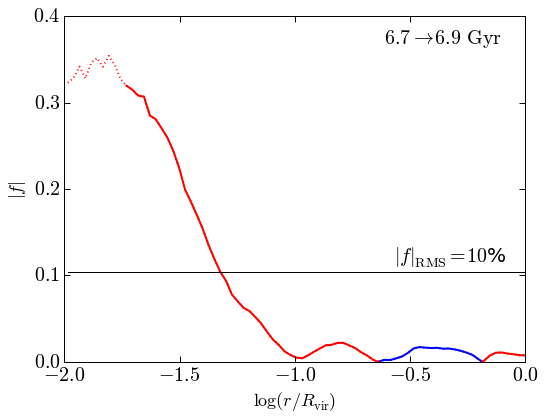

In [17]:
limits=[-2, 0.0, 0, 0.4]
figsize=(8,6)

figure(figsize=figsize)
j=1

plot(log10(rf/Rvir),nancore*fprofile,color='b',lw=2)
plot(log10(rf/Rvir),fprofile,color='b',linestyle=':',lw=2)
plot(log10(rf/Rvir),-nancore*fprofile,color='r',lw=2)
plot(log10(rf/Rvir),-fprofile,color='r',linestyle=':',lw=2)
plot(log10(rf/Rvir),ones_like(rf)*fmean[k+1],color='k',lw=1)

ax = gca()
ax.axis(limits)
ax.text(0.95,0.92, r'${:.01f}$'.format(t1) + r'$\rm \rightarrow$' + r'${:.01f}$'.format(t2) + r' $\rmGyr$', transform=ax.transAxes, color=col,fontsize=fontsize,ha='right')
ax.text(-0.57,fmean[k+1]+0.01, r'$|f|_{\rm RMS} = %.0f$'%(fmean[k+1]*100)+'%', fontsize = fontsize,color='k')

xlabel(r'$\log(r/R_{\rmvir})$')#,fontsize=textfont+2)
ylabel(r'$|f|$')#,fontsize=textfont+2)
        
xticknames=[r'$-2.0$',r'$-1.5$',r'$-1.0$',r'$-0.5$',r'$0.0$']
xticks([-2.,-1.5,-1,-0.5,0.],xticknames,visible=True)
yticknames=[r'$0.0$',r'$0.1$',r'$0.2$',r'$0.3$',r'$0.4$']
yticks([0,0.1,0.2,0.3,0.4],yticknames,visible=True)
        

delta    =  0.023204006007
delta_i  =  0.077377983979
delta_if =  0.0541983059548
fmean    =  0.104496280158
fstd     =  0.128060607408


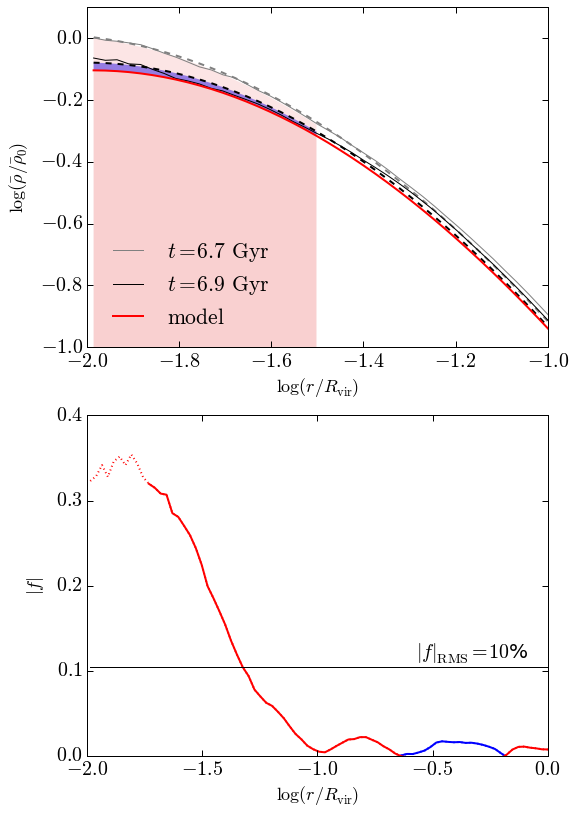

In [26]:
# BOTH IN A SINGLE PLOT

rcParams['figure.subplot.wspace']=0.1
rcParams['figure.subplot.hspace']=0.2
delta_ymin=-1.
comp='d'
plot_prediction=True
rmin_evolve=10**-1.75
rmax_evolve=1
Ttype='Tmulti'
limits=[-2., -1,-1., 0.1]
limits_fprofile=[-2.2, 0.2, -0.05, 0.55]
figsize=(8,13)
use_RMvir=False

fig, ax = subplots(nrows=2, ncols=1,figsize=figsize)

j=1
for (i,col,label) in zip((k,k+1),('gray','black'),('before','after')):
    ss = gl[i]
    t = ss['t']
    r = ss[comp]['r']
    brho = ss[comp]['brho']
    brhofit = ss[comp][fitname]['brho']
    p = ss[comp][fitname]['p']

    Rvir=rvir_fangzhou[i]
    Mvir=mvir_fangzhou[i]

    if j==1: 
        brhov = brho[abs(array(r)-0.01*Rvir)==abs(array(r)-0.01*Rvir).min()]
        pi=p
        ssi=ss
        gammai=ss[component]['gamma']
        betai =ss[component]['beta_smooth']
        alphai =ss[component]['alpha']

        ax[0].plot(log10(r/Rvir),log10(brho/brhov),color=col,label=r'$t=%.1f$ $\rm Gyr$'%t1)
        ax[0].plot(log10(r/Rvir),log10(brhofit/brhov),'--',color=col,lw=2)  

    if j == 2:
        pf=p
        rf=r
        t1 = ss['flowdata']['t1']
        t2 = ss['flowdata']['t2']

        ax[0].plot(log10(r/Rvir),log10(brho/brhov),color=col,label=r'$t=%.1f$ $\rm Gyr$'%t2)
        ax[0].plot(log10(r/Rvir),log10(brhofit/brhov),'--',color=col,lw=2)  

        if plot_prediction:
                # Define m
                m=[]
                for i in range(size(rf)):
                    mval=get_m(ss,rf[i])
                    m.append(mval)
                m=array(m)
                Mi = prf.M(rf, pi)

                # EVOLVE PROFILE
                wcore = 0*(r<=rmin_evolve*Rvir)+1*((r>rmin_evolve*Rvir)&(r<=rmax_evolve*Rvir))+0*(r>rmax_evolve*Rvir)
                nancore=nan*ones_like(wcore)
                nancore[where(wcore==1)]=1

                if Ttype=='Tmulti':
                    M_rmin=max(ss[comp]['r'][0],ss['all']['r'][0])
                    M_d = ss[comp]['M'][where(ss[comp]['r']>M_rmin)]
                    M_a = ss['all']['M'][where(ss[comp]['r']>M_rmin)]
                    M_rr=r[where(ss[comp]['r']>M_rmin)]
                    M_ratio=M_a/M_d

                    slope, intercept,_,_,_ = stats.linregress(log10(M_rr/Rviri),log10(M_ratio))
                    Mratio=10**intercept
                    Mn=-slope
                    add_params=[Mratio,Mn]

                if use_RMvir:
                        res = evolve(rf, rf, Mi, pi, m, alphai,alphai,gammai,gammai,betai,betai, Ttype=Ttype, w=wcore, method='halo',add_params=add_params,Rvirf=Rvir,Mvirf=Mvir)
                else:
                        res = evolve(rf, rf, Mi, pi, m, alphai,alphai,gammai,gammai,betai,betai, Ttype=Ttype, w=wcore, method='halo',add_params=add_params)

                p_model = res['pf']
                brhofit_model = prf.brho(rf,res['pf'])
                ax[0].plot(log10(rf/Rvir),log10(brhofit_model/brhov),'-',color='red',label=r'$\rm model$',lw=2)


    j+=1

ax[0].axis(limits)

maxr = rmax_fit*Rvirf
rr=rf[rf<=maxr]
Darea=fit.Delta_area(log10(rr/Rvirf),log10(prf.brho(rr, pf)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)
Darea_i=fit.Delta_area(log10(rr/Rvir),log10(prf.brho(rr, pi)/brhov),log10(prf.brho(rr, p_model)/brhov),xlimits=delta_xlim,ymin=delta_ymin)
Darea_if=fit.Delta_area(log10(rr/Rvir),log10(prf.brho(rr, pi)/brhov),log10(prf.brho(rr, pf)/brhov),xlimits=delta_xlim,ymin=delta_ymin)

maxr = rmax_evolve*Rvirf
fmeani= mean(abs(array_nonan(fprofile[rf<=maxr])))
fstdi = std(abs(array_nonan(fprofile[rf<=maxr])))

print 'delta    = ', Darea
print 'delta_i  = ', Darea_i
print 'delta_if = ', Darea_if
print 'fmean    = ', fmeani
print 'fstd     = ', fstdi


logr=log10(r/Rvir)
ifill=where((logr>delta_xlim[0])&(logr<delta_xlim[1]))
ax[0].fill_between(logr[ifill],delta_ymin*ones_like(logr[ifill]),log10(prf.brho(rr, pi)/brhov)[ifill],facecolor='lightcoral',alpha=0.2,lw=0)
ax[0].fill_between(logr[ifill],delta_ymin*ones_like(logr[ifill]),log10(prf.brho(rr, pf)/brhov)[ifill],facecolor='lightcoral',alpha=0.2,lw=0)
if plot_prediction:
    ax[0].fill_between(logr[ifill],log10(prf.brho(rr, pf)/brhov)[ifill],log10(brhofit_model/brhov)[ifill],facecolor='blue',alpha=0.4,lw=0) #hatch="X",edgecolor="k"

ax[0].legend(loc='lower left',frameon=False)

ax[0].set_xlabel(r'$\log(r/R_{\rmvir})$')#,labelpad=10)#,fontsize=textfont)
ax[0].set_ylabel(r'$\log(\bar{\rho}/\bar{\rho}_{0})$',labelpad=10)#,labelpad=0)#,fontsize=textfont+2)
ax[0].set_xticks([-2.,-1.8,-1.6,-1.4,-1.2,-1.])#,yticknames)#,visible=True)
ax[0].set_xticklabels([r'$-2.0$',r'$-1.8$',r'$-1.6$',r'$-1.4$',r'$-1.2$',r'$-1.0$'])#,yticknames)
ax[0].set_yticks([-1,-0.8,-0.6,-0.4,-0.2,0.])#,yticknames)#,visible=True)
ax[0].set_yticklabels([r'$-1.0$',r'$-0.8$',r'$-0.6$',r'$-0.4$',r'$-0.2$',r'$0.0$'])#,yticknames)



limits=[-2, 0.0, 0, 0.4]
figsize=(8,6)

j=1

ax[1].plot(log10(rf/Rvir),nancore*fprofile,color='b',lw=2)
ax[1].plot(log10(rf/Rvir),fprofile,color='b',linestyle=':',lw=2)
ax[1].plot(log10(rf/Rvir),-nancore*fprofile,color='r',lw=2)
ax[1].plot(log10(rf/Rvir),-fprofile,color='r',linestyle=':',lw=2)
ax[1].plot(log10(rf/Rvir),ones_like(rf)*fmean[k+1],color='k',lw=1)
ax[1].axis(limits)
ax[1].text(-0.57,fmean[k+1]+0.01, r'$|f|_{\rm RMS} = %.0f$'%(fmean[k+1]*100)+'%', fontsize = fontsize,color='k')
ax[1].set_xlabel(r'$\log(r/R_{\rmvir})$')#,fontsize=textfont+2)
ax[1].set_ylabel(r'$|f|$',labelpad=10)#,fontsize=textfont+2)
ax[1].set_xticks([-2.,-1.5,-1,-0.5,0.])#,xticknames,visible=True)
ax[1].set_xticklabels([r'$-2.0$',r'$-1.5$',r'$-1.0$',r'$-0.5$',r'$0.0$'])
ax[1].set_yticks([0,0.1,0.2,0.3,0.4])#,yticknames,visible=True)
ax[1].set_yticklabels([r'$0.0$',r'$0.1$',r'$0.2$',r'$0.3$',r'$0.4$'])
    